# 1) LDA with least squares

### a) on paper

### b) Generating dataset

In [216]:
import numpy as np
from sklearn import datasets
X, y = datasets.make_blobs(n_samples = 200, n_features= 4,
centers = 2, cluster_std= 2, random_state= 100)

### c) Scikit learn LDA

In [217]:
def unit_vector(w):
    w_len = np.linalg.norm(w)
    return w/w_len    

In [218]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score
clf = LinearDiscriminantAnalysis()
clf.fit(X,y)
y_preds = clf.predict(X)
w_clf = np.array([clf.intercept_[0]] + [clf.coef_[0][i] for i in range(0,4)])
print(f'w_clf: {w_clf}')
wclf_hat = unit_vector(w_clf)
print(f'unit vector of w_clf: {wclf_hat}')
print(f'accuracy: {accuracy_score(y,y_preds)}')
print(clf.means_)

w_clf: [-13.15991647  -2.59459674  -0.36223565   1.68986516  -0.37538227]
unit vector of w_clf: [-0.97269447 -0.19177553 -0.02677408  0.12490372 -0.02774579]
accuracy: 0.995
[[ 0.84922503 -4.62796125 -1.41577713  6.99374839]
 [-9.9060701  -7.7246149   3.39540691  6.32301981]]


### d) Comparing directions

In [219]:
m0 = np.array([np.mean(X[y==0][:, i]) for i in range(0,4)])
m1 = np.array([np.mean(X[y==1][:, i]) for i in range(0,4)])
m = m1 - m0
print(f'm0: {m0}')
print(f'm1: {m1}')
print(f'mean seperator: {m}')

m0: [ 0.84922503 -4.62796125 -1.41577713  6.99374839]
m1: [-9.9060701  -7.7246149   3.39540691  6.32301981]
mean seperator: [-10.75529513  -3.09665365   4.81118404  -0.67072859]


In [220]:
Sw0 = np.matmul((X[y==0]-m0).T,(X[y==0]-m0))
Sw1 = np.matmul((X[y==1]-m1).T,(X[y==1]-m1))
Sw=Sw0+Sw1
print(f'The within-class covariance is \n {Sw}\n')
Sw_inv = np.linalg.inv(Sw)
print(f'The inverse within-class covariance is \n {Sw_inv}')

The within-class covariance is 
 [[ 947.22219803  102.33358083  176.84605686 -176.71073141]
 [ 102.33358083  838.32220079  -11.35168158   65.98618758]
 [ 176.84605686  -11.35168158  803.0006232  -134.22020078]
 [-176.71073141   65.98618758 -134.22020078  907.29047659]]

The inverse within-class covariance is 
 [[ 1.15233718e-03 -1.59666466e-04 -2.22073971e-04  2.03197674e-04]
 [-1.59666466e-04  1.22185464e-03  3.32060929e-05 -1.15049569e-04]
 [-2.22073971e-04  3.32060929e-05  1.31970537e-03  1.49563040e-04]
 [ 2.03197674e-04 -1.15049569e-04  1.49563040e-04  1.17225222e-03]]


In [221]:
n = len(X[:,0])
w_proportional = np.matmul(Sw_inv,m)
print(f'''Since w is proportional to the product of Sw_inv and m,
We get the direction of w from the signs of product:
w ∝ {w_proportional}''')

Since w is proportional to the product of Sw_inv and m,
We get the direction of w from the signs of product:
w ∝ [-0.01310402 -0.00182947  0.00853467 -0.00189587]


In [222]:
print(f'w_clf: {w_clf[1:]}\nw_unit: {unit_vector(w_proportional)}')

w_clf: [-2.59459674 -0.36223565  1.68986516 -0.37538227]
w_unit: [-0.82630038 -0.11536107  0.53817081 -0.11954787]


In [223]:
# So w1 has matching signs in both scikit and our calculations.
# To check again with our equation 1, we need Sb.

Sb = np.matmul(m.reshape(4,1),m.reshape(4,1).T)
print(f"The between class covariance:\n {Sb}")

The between class covariance:
 [[115.6763733   33.30542388 -51.74570425   7.21388389]
 [ 33.30542388   9.58926381 -14.8985706    2.07701412]
 [-51.74570425 -14.8985706   23.14749185  -3.22699867]
 [  7.21388389   2.07701412  -3.22699867   0.44987684]]


In [224]:
# For formula in equation 1, we have different target encoding scheme.
N=len(X)
N1=len(X[y==1])
N2=len(X[y==0])
M1= np.array([np.mean(X[y==1][:, i]) for i in range(0,4)])
M2= np.array([np.mean(X[y==0][:, i]) for i in range(0,4)])
w = np.matmul(np.linalg.inv((Sw + (N1*N2/N)*Sb)), N*(M1-M2))

In [225]:
print(f'''
Unit Weights from classifier: 
{unit_vector(w_clf)[1:]}

Unit Weights from Sw: 
{unit_vector(w_proportional)}

Unit Weights from Equation 1: 
{unit_vector(w)}
''')


Unit Weights from classifier: 
[-0.19177553 -0.02677408  0.12490372 -0.02774579]

Unit Weights from Sw: 
[-0.82630038 -0.11536107  0.53817081 -0.11954787]

Unit Weights from Equation 1: 
[-0.82630038 -0.11536107  0.53817081 -0.11954787]



All 3 vectors have same direction. \
\
To get same direction from equation 1, we have to change the target encoding scheme since the equation assumes class C1 is the class where, \
\
yi > threshold(0) and remaining are class C2

# 2) Linear Multi Classifier

In [226]:
from sklearn import datasets
X, y = datasets.make_blobs(n_samples = 200, n_features= 4,
centers = 4, cluster_std= 2, random_state= 100)

## 2.1 LDA Multiclassification

### a) Within class and Between class scatter matrix


In [227]:
# # We have 4 classes 0, 1, 2, 3

# m0 = np.array([np.mean(X[y==0][:, i]) for i in range(0,4)])
# m1 = np.array([np.mean(X[y==1][:, i]) for i in range(0,4)])
# m2 = np.array([np.mean(X[y==2][:, i]) for i in range(0,4)])
# m3 = np.array([np.mean(X[y==3][:, i]) for i in range(0,4)])
# N0, N1, N2, N3, N = len(X[y==0]),len(X[y==1]),len(X[y==2]),len(X[y==3]), len(X)
# m = 1/N * (N0*m0 + N1*m1 + N2*m2 + N3*m3)

# print(f'm0: {m0}')
# print(f'm1: {m1}')
# print(f'm2: {m2}')
# print(f'm3: {m3}')
# print(f'm: {m}')

# Sw0 = np.matmul((X[y==0]-m0).T,(X[y==0]-m0))
# Sw1 = np.matmul((X[y==1]-m1).T,(X[y==1]-m1))
# Sw2 = np.matmul((X[y==2]-m2).T,(X[y==2]-m2))
# Sw3 = np.matmul((X[y==3]-m3).T,(X[y==3]-m3))
# Sw1=Sw0+Sw1+Sw2+Sw3
# print(f'\nThe within-class scatter is \n {Sw1}\n')
# # Sw_inv = np.linalg.inv(Sw)
# # print(f'The inverse within-class covariance is \n {Sw_inv}')

# Sb0 = N0 * np.matmul((m0-m).reshape(4,1),(m0-m).reshape(4,1).T)
# Sb1 = N1 * np.matmul((m1-m).reshape(4,1),(m1-m).reshape(4,1).T)
# Sb2 = N2 * np.matmul((m2-m).reshape(4,1),(m2-m).reshape(4,1).T)
# Sb3 = N3 * np.matmul((m3-m).reshape(4,1),(m3-m).reshape(4,1).T)
# Sb1=Sb0+Sb1+Sb2+Sb3
# print(f"\nThe between class covariance:\n {Sb1}")


In [228]:
mean_vectors = []
for cl in range(0,4):
    mean_vectors.append(np.mean(X[y==cl], axis = 0))
    print("Mean Vector %s: %s\n" %(cl,mean_vectors[cl]))
SW = np.zeros((4,4))
for cl, mv in zip(range(0,4),mean_vectors):
    class_sc_mat = np.zeros((4,4))
    for x_ in X[y==cl]:
        x_, mv = x_.reshape(4,1), mv.reshape(4,1)
        class_sc_mat += (x_-mv).dot((x_-mv).T)
    SW += class_sc_mat
print(f'The within class scatter is :\n\n{SW}')

Mean Vector 0: [ 0.67866615 -4.97867298 -1.29679893  6.74684992]

Mean Vector 1: [-9.79749136 -7.35371647  3.30524406  6.85846548]

Mean Vector 2: [-7.05594358  1.4578088   7.96547405 -5.92063367]

Mean Vector 3: [-6.43287841 -8.072347   -5.64148256  9.22435077]

The within class scatter is :

[[ 944.86936777  100.21789181  182.37376817 -187.03507488]
 [ 100.21789181  824.81439604   -1.16004932   49.53023336]
 [ 182.37376817   -1.16004932  806.26599896 -136.51799837]
 [-187.03507488   49.53023336 -136.51799837  906.700513  ]]


In [229]:
Overall_Mean = np.mean(X, axis = 0)
print(f'Overall Mean: {Overall_Mean}')
SB = np.zeros((4,4))
for i, mean_vec in enumerate(mean_vectors):
    n = X[y==i, :].shape[0]
    mean_vec = mean_vec.reshape(4,1)
    overall_mean = Overall_Mean.reshape(4,1)
    SB += n*(mean_vec-overall_mean).dot((mean_vec - overall_mean).T)
print(f'The between class scatter is:\n\n{SB}')

Overall Mean: [-5.6519118  -4.73673191  1.08310915  4.22725812]
The between class scatter is:

[[ 2992.16306127   161.24814615 -1434.48040744   769.39964608]
 [  161.24814615  2820.29031799  2991.21219433 -4351.26641519]
 [-1434.48040744  2991.21219433  5159.44631406 -5179.72006171]
 [  769.39964608 -4351.26641519 -5179.72006171  7061.11189325]]


### b) Reducing dimensions and plotting

In [230]:
eigenvalues, eigenvectors = np.linalg.eig(np.linalg.inv(SW).dot(SB))

for i in range(len(eigenvalues)):
    eigenvectors_sc = eigenvectors[:,i].reshape(4,1)
    print("Eigenvalue {:} : {:.2e}".format(i+1,eigenvalues[i].real))
    print("Eigenvectors {}: \n{}".format(i+1, eigenvectors_sc.real))

Eigenvalue 1 : 1.79e+01
Eigenvectors 1: 
[[-0.40666025]
 [ 0.44935973]
 [ 0.52708315]
 [-0.59572361]]
Eigenvalue 2 : 3.54e+00
Eigenvectors 2: 
[[ 0.79649247]
 [ 0.38902632]
 [-0.36542897]
 [-0.28411255]]
Eigenvalue 3 : 9.31e-01
Eigenvectors 3: 
[[-0.39045882]
 [ 0.1573107 ]
 [-0.77984851]
 [-0.46328345]]
Eigenvalue 4 : 2.97e-17
Eigenvectors 4: 
[[-0.17811888]
 [ 0.82621802]
 [ 0.00796513]
 [ 0.53439125]]


In [231]:
eigenvalues, eigenvectors = np.linalg.eig(np.linalg.inv(SW).dot(SB))
eigen_pairs = [(np.abs(eigenvalues[i]),eigenvectors[:,i]) for i in range(len(eigenvalues))]

eigen_pairs = sorted(eigen_pairs, key = lambda k: k[0], reverse = True)
print("Eigenvalues in decreasing order: \n")
for i in eigen_pairs:
    print(i[0])

Eigenvalues in decreasing order: 

17.91571396045975
3.53643522340268
0.9314534781318429
2.970154976366423e-17


In [232]:
eigenvalues_sum = sum(eigenvalues)
for i, j in enumerate(eigen_pairs):
    print("Eigenvalue {0:}: {1: .2%}".format (i+1, (j[0]/eigenvalues_sum).real))

Eigenvalue 1:  80.04%
Eigenvalue 2:  15.80%
Eigenvalue 3:  4.16%
Eigenvalue 4:  0.00%


In [233]:
# Since Eigenvalues 1 & 2 are the majority of contribution, 
# we construct weight matrix with these two eignenvectors.

W = np.hstack((eigen_pairs[0][1].reshape(4,1), eigen_pairs[1][1].reshape(4,1)))
print("Matrix W:\n",W.real)

Matrix W:
 [[-0.40666025  0.79649247]
 [ 0.44935973  0.38902632]
 [ 0.52708315 -0.36542897]
 [-0.59572361 -0.28411255]]


In [234]:
X_lda = X.dot(W)

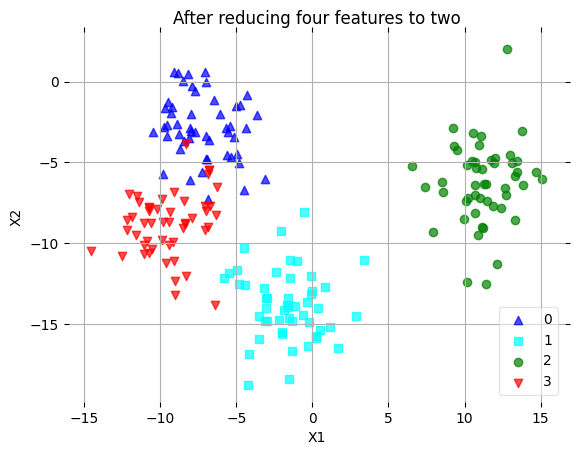

In [235]:
from matplotlib import pyplot as plt

def plot_lda():

    ax = plt.subplot(111)
    for label,marker,color in zip(
        range(0,4),('^', 's', 'o', 'v'),('blue', 'cyan', 'green', 'red')):

        plt.scatter(x=X_lda[:,0][y == label],
                y=X_lda[:,1][y == label],
                marker=marker,
                color=color,
                alpha=0.7,
                label=label
                )

    plt.xlabel('X1')
    plt.ylabel('X2')

    legend = plt.legend(loc='lower right', fancybox=True)
    legend.get_frame().set_alpha(0.5)
    plt.title('After reducing four features to two')

    plt.tick_params(axis="both", which="both", bottom="off", top="off",  
            labelbottom="on", left="off", right="off", labelleft="on")

    ax.spines["top"].set_visible(False)  
    ax.spines["right"].set_visible(False)
    ax.spines["bottom"].set_visible(False)
    ax.spines["left"].set_visible(False)    

    plt.grid()
    plt.tight_layout
    plt.show()

plot_lda()

All 4 labels are seperated. X1 corresponds to eigenvector with 85% contribution and it is visible that it plays more part in seperation than X2, but X2 cannot be ignored as it seperates red, blue and a part of cyan.
Green is the best sepeated label ie. y=2. Red and blue have minor overlaps but overall all of them could be seperated with 3 lines.

## 2.2 Perceptioin Multiclassification

### a) Multiclass Weight matrix

In [236]:
def step(X):
    return int(1) if X > 0 else int(-1)

cl = [0,1,2,3] # class labels 

In [237]:
def perceptron_multi(w, X, Y, epochs, cl):
    weights = []
    for i in range(len(cl)):
        ynew = np.array([1 if k==cl[i] else -1 for k in Y])
        for epoch in np.arange(0, epochs):
            for j in range(0,len(ynew)):
                h = step(np.dot(np.append(1, X[j]),w))
                if h != ynew[j]:
                    error = float(h - ynew[j])
                    w = w - error*(np.append(1,X[j]))
        weights.append(w)
    return np.concatenate(weights).reshape(4,5)

In [238]:
w = np.array([0, 0, 0, 0, 0])
w = perceptron_multi(w, X, y, 500, cl)

In [239]:
print(f'The weight matrix is as follows:\n\n {w}')

The weight matrix is as follows:

 [[   74.           136.05277577    -6.91504054     3.75526336
     36.13104496]
 [-1606.           -78.36842769   -62.09311314   104.26316832
    103.62517625]
 [-1596.           -76.93554633    56.00681384   174.29770436
   -103.16555592]
 [-1398.           -54.22747334   -69.41417614  -157.62142436
     69.25256071]]


In [240]:
print(f'The weight matrix is as follows:\n\n {unit_vector(w)}')

The weight matrix is as follows:

 [[ 0.02752986  0.05061505 -0.00257257  0.00139705  0.01344166]
 [-0.59747231 -0.02915502 -0.0231002   0.03878852  0.03855117]
 [-0.59375206 -0.02862195  0.02083594  0.06484312 -0.03838018]
 [-0.52009109 -0.02017398 -0.02582382 -0.05863913  0.02576369]]


### b) Writing the multistep function

In [241]:
def multi_stepfunction(w, X, cl):
    preds = []
    for i in range(len(X)):
        predict = -10000
        label = -1
        for j in cl:
            pred = np.dot((np.append(np.ones(1),X[i])),w[cl.index(j)])
            if pred > predict:
                predict = pred
                label = j
        preds.append(label)
    return preds
        

def perceptron_accuracy(y, Y):
    print(f'accuracy of perceptron implementation: {accuracy_score(y,Y)*100:.2f}%')

In [242]:
# Checking weather individual X match with predict.
k = 45
Y = multi_stepfunction(w, X[k-1:k], cl)
print(Y, y[k-1:k])


[2] [2]


In [243]:
final_preds = multi_stepfunction(w, X, cl)
perceptron_accuracy(y,final_preds)

accuracy of perceptron implementation: 97.00%


### c) Comparing weight matrix from 2.1

In [244]:
# Compared to the W we found here, in 2.1 W had only 2 columns 
# since we chose 2 eigenvectors
W

array([[-0.40666025,  0.79649247],
       [ 0.44935973,  0.38902632],
       [ 0.52708315, -0.36542897],
       [-0.59572361, -0.28411255]])

In [245]:
cl = [0, 1, 2, 3]
def multi_stepfunction2(w, X, cl):
    preds = []
    for i in range(len(X)):
        pred = np.dot(X[i],W)
        if pred[0] > 5:
            label = cl[2]
        elif pred[0] > -5 and pred[1] < -7.5:
            label = cl[1]
        elif pred[0] < 0 and pred[1] > -6:
            label = cl[0]
        else:
            label = cl[3]
        preds.append(label)
    return preds

Conditions are written from a visual glance. Better conditions can be written through calculations.

In [246]:
final_preds2 = multi_stepfunction2(w, X, cl)
print(f'Accuracy obtained from LDA: {accuracy_score(y, final_preds2)*100:.2f}')

Accuracy obtained from LDA: 95.00


# 3) Ridge Regularization

### a) Ridge

In [247]:
import pandas as pd
df = pd.read_csv('save.csv')

In [248]:
df.head(2)

,Unnamed: 0,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,212,0.727074,0.652898,0.818724,0.529111,0.903132,0.424780,0.303665
1,15,1.000000,0.908825,0.574256,0.529111,0.816687,0.853719,0.642234


In [249]:
df = df.set_index('Unnamed: 0')
df.index.names = [None]

In [250]:
df.head()

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
212,0.727074,0.652898,0.818724,0.529111,0.903132,0.424780,0.303665
15,1.000000,0.908825,0.574256,0.529111,0.816687,0.853719,0.642234
378,0.727074,0.927647,0.577607,0.915650,0.584040,0.856265,0.413613
125,0.545852,0.178217,0.315459,0.817272,0.482853,0.763784,0.609075
109,1.000000,0.326388,0.853980,0.621298,0.428469,0.287870,0.256545


In [251]:
from sklearn.linear_model import Ridge
n_samples, n_features = 10, 5
np.random.seed(0)
y = df[df.columns[6:]]
X = df[df.columns[:6]]
clf = Ridge(alpha=1.0)
clf.fit(X, y) 

Ridge()

In [252]:
clf.coef_

array([[ 0.06635707, -0.22957532, -0.42438088,  0.09912705,  0.27228114,
         0.07204174]])

In [253]:
hw2_weights = [0.073163, -0.232697, -0.373026, 0.106634, 0.309306, 0.115830]
clf.coef_ - hw2_weights

array([[-0.00680593,  0.00312168, -0.05135488, -0.00750695, -0.03702486,
        -0.04378826]])

We can observe that clf weights are slightly smaller except w2 than Hw2 weights but have same direction.

### b) My ridge function

In [254]:
X = pd.read_csv('trainx.csv')
y = pd.read_csv('traint.csv')

In [255]:
y = y.squeeze()
y

0      0.303665
1      0.642234
2      0.413613
3      0.609075
4      0.256545
         ...   
275    0.209424
276    0.312391
277    0.225131
278    0.453752
279    0.017452
Name: Y house price of unit area, Length: 280, dtype: float64

In [256]:
import random
def mse(preds, test):
    mse = np.square(np.subtract(preds, test)).mean()
    return mse

def my_ridge(x, y, lr, iterations, lamb):
    n = len(y)
    w0=random.random()
    w1=np.random.rand(x.shape[1])
    w0_list, w1_list, mse = [], [], []
    for i in range(iterations):
        h = np.dot(x, w1) + w0
        loss = 0.5*(np.square(np.subtract(y, h)).mean() + lamb/np.square(np.linalg.norm(w1)))
        dw1 = (1*(x.T).dot(y - h))/n + 2*lamb
        dw0 = 1 * (np.sum(y - h))/n + 2*lamb
        w1 -= lr*dw1
        w0 -= lr*dw0
        w1_list.append(w1)
        w0_list.append(w0)
        mse.append(loss)
    print(f'MSE after {iterations} iterations at Lr = {lr} is {mse[-1]}')    
    return w1_list, w0_list, mse


In [257]:
import random
def lr_model(features,labels,learning_rate,iterations, lamb):
    n = len(labels)
    w0=random.random()
    w1=np.random.rand(features.shape[1])
    w0_list, w1_list, mse = [], [], []
    for i in range(iterations):
        h = np.dot(features, w1) + w0
        loss = np.square(np.subtract(labels, h)).mean() + (lamb/2)*np.square(np.linalg.norm(w1))
        dw1 = -(2*(features.T).dot(labels - h))/n + (lamb*np.linalg.norm(w1))
        dw0 = -2 * (np.sum(labels - h))/n
        w1 -= learning_rate*dw1
        w0 -= learning_rate*dw0
        w1_list.append(w1)
        w0_list.append(w0)
        mse.append(loss)
    print(f'MSE after {iterations} iterations at Lr = {learning_rate} is {mse[-1]}')    
    return w1_list, w0_list, mse

In [258]:
import warnings
#suppress warnings
warnings.filterwarnings('ignore')
w1, w0, mse = lr_model(X, y,0.1, 1000, 0.001)

MSE after 1000 iterations at Lr = 0.1 is 0.012846904483868578


In [259]:
w1[-1], w0[-1]

(X1 transaction date                       0.070735
 X2 house age                             -0.237373
 X3 distance to the nearest MRT station   -0.398847
 X4 number of convenience stores           0.100202
 X5 latitude                               0.301554
 X6 longitude                              0.099719
 dtype: float64,
 0.4597918209991613)

In [260]:
hw2_weights

[0.073163, -0.232697, -0.373026, 0.106634, 0.309306, 0.11583]

In [261]:
w1[-1] - hw2_weights 

X1 transaction date                      -0.002428
X2 house age                             -0.004676
X3 distance to the nearest MRT station   -0.025821
X4 number of convenience stores          -0.006432
X5 latitude                              -0.007752
X6 longitude                             -0.016111
dtype: float64

### c) Summary

We dont get exact values as hw2 when lambda = 0 is because there is not seed set for weights initialisation and hence each run gives slightly different weights.
When we set value of lambda and use ridge regularisation, the weights obtained are slightly smaller due to the lambda value addeed in our loss.